# 回帰

サンプルデータから回帰し、フィットする（前後関係ない）

## まず、決まった関数でサンプルデータを作成しよう

※：今回は関数で作成しても、センサーなどで取得したデータとして考えてください～

In [1]:
import math
import numpy as np

# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    y += np.random.normal(0, 0.2)  # 少しノイズを加える
    return y


# 信号を生成
def generate_signal(dropout):
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-3, 3, 0.025):
    
        # ランダムにデータが失う
        if np.random.random_sample() < dropout:
            continue
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

In [2]:
data_x, data_y = generate_signal(0.5)

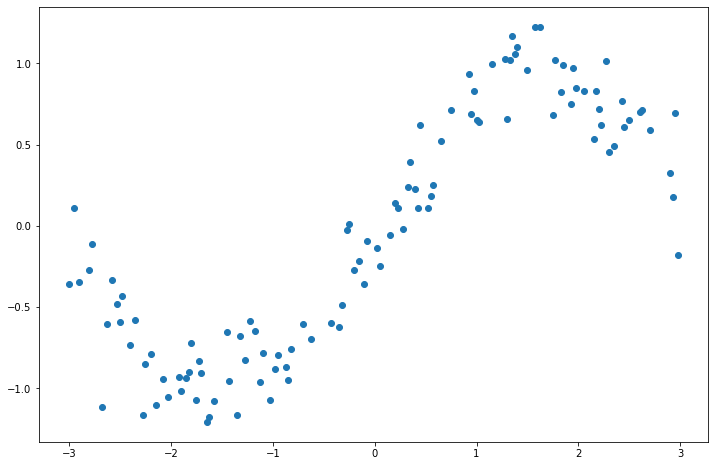

In [3]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

## モデルを作成

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    lyr_input = Input(shape=(1,))
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_input)
    lyr_hiddn = Dense(units=16, activation="tanh")(lyr_hiddn)
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_hiddn)
    lyr_outpt = Dense(units=1, activation="tanh")(lyr_hiddn)
    
    model = Model(inputs=lyr_input, outputs=lyr_outpt)
    model.summary()
    
    #回帰の場合は誤差を減らしたいため、mseはOK
    model.compile(optimizer="adam", loss="mse")
    
    return model
    
model = create_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


## データを前処理し、学習しましょう！

In [5]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

In [6]:
model.fit(data_x, prep_y, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6636
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5025
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2562
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1712
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1035
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0738
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 104/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 105/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 106/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 107/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 108/1000
4/4 [==============================] - ETA: 0s - loss: 0.012 - 0s 1ms/step - loss: 0.0131
Epoch 109/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 110/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 111/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 112/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 113/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 114/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 115/1000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 206/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 208/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 211/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 215/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 306/1000
4/4 [==============================] - 0s 919us/step - loss: 0.0094
Epoch 307/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 308/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 309/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 310/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 311/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 312/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 313/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 314/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 315/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 316/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 317/1000
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 407/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 408/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 409/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 410/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 411/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 412/1000
4/4 [==============================] - 0s 956us/step - loss: 0.0090
Epoch 413/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 415/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 416/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 417/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 418/1000
4/4 [=====================

4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 507/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 508/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 509/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 510/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 511/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 512/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 514/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 516/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 517/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 518/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 608/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 609/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 610/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 613/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 614/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 617/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 618/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 619/1000
4/4 [=======================

Epoch 708/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 709/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 710/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 711/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 712/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 713/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 714/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 715/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 716/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 717/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 718/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 719/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 720/1000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 809/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 810/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 812/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 813/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 814/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 815/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 816/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 818/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 819/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 820/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 909/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 910/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 911/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 912/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 913/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 914/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 915/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 916/1000
4/4 [==============================] - 0s 851us/step - loss: 0.0078
Epoch 917/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 918/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 919/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 920/1000
4/4 [=====================

In [7]:
#推定
pred_y = model.predict(data_x)

In [8]:
# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

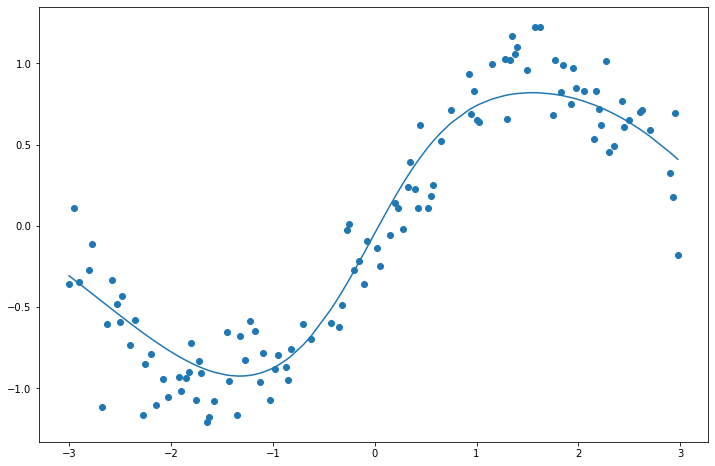

In [9]:
#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)

## 他の関数はどう？

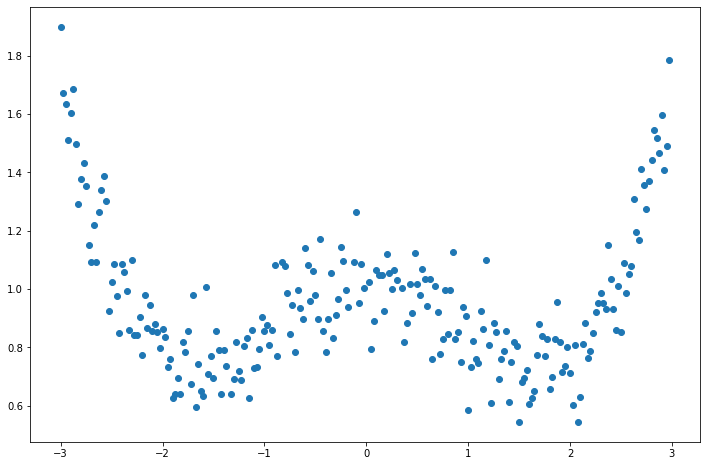

In [10]:
# 数値を作る関数
def gen_function(x):
    y = math.cos(x) + 0.3 * (x * x)
    y += np.random.normal(0, 0.1)  # 少しノイズを加える
    return y

data_x, data_y = generate_signal(0.01)

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [11]:
model = create_model()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [12]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1254
Epoch 2/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 3/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0596
Epoch 4/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0445
Epoch 5/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 6/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 7/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 8/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 9/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 10/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0349
Epoch 11/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 12/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 13/1000
8/8 [==============================

8/8 [==============================] - 0s 697us/step - loss: 0.0255
Epoch 103/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 104/1000
8/8 [==============================] - 0s 872us/step - loss: 0.0250
Epoch 105/1000
8/8 [==============================] - 0s 947us/step - loss: 0.0256
Epoch 106/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 107/1000
8/8 [==============================] - 0s 975us/step - loss: 0.0247
Epoch 108/1000
8/8 [==============================] - 0s 916us/step - loss: 0.0243
Epoch 109/1000
8/8 [==============================] - 0s 918us/step - loss: 0.0243
Epoch 110/1000
8/8 [==============================] - 0s 972us/step - loss: 0.0238
Epoch 111/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 112/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 113/1000
8/8 [==============================] - 0s 914us/step - loss: 0.0237
Epoch 114/1000
8/8 [=======

8/8 [==============================] - 0s 568us/step - loss: 0.0126
Epoch 202/1000
8/8 [==============================] - 0s 703us/step - loss: 0.0133
Epoch 203/1000
8/8 [==============================] - 0s 606us/step - loss: 0.0129
Epoch 204/1000
8/8 [==============================] - 0s 673us/step - loss: 0.0136
Epoch 205/1000
8/8 [==============================] - 0s 706us/step - loss: 0.0132
Epoch 206/1000
8/8 [==============================] - 0s 597us/step - loss: 0.0127
Epoch 207/1000
8/8 [==============================] - 0s 609us/step - loss: 0.0124
Epoch 208/1000
8/8 [==============================] - 0s 634us/step - loss: 0.0123
Epoch 209/1000
8/8 [==============================] - 0s 755us/step - loss: 0.0125
Epoch 210/1000
8/8 [==============================] - 0s 681us/step - loss: 0.0123
Epoch 211/1000
8/8 [==============================] - 0s 626us/step - loss: 0.0123
Epoch 212/1000
8/8 [==============================] - 0s 918us/step - loss: 0.0124
Epoch 213/1000
8/8 

8/8 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 300/1000
8/8 [==============================] - 0s 944us/step - loss: 0.0103
Epoch 301/1000
8/8 [==============================] - 0s 803us/step - loss: 0.0097
Epoch 302/1000
8/8 [==============================] - 0s 617us/step - loss: 0.0094
Epoch 303/1000
8/8 [==============================] - 0s 717us/step - loss: 0.0098
Epoch 304/1000
8/8 [==============================] - 0s 632us/step - loss: 0.0095
Epoch 305/1000
8/8 [==============================] - 0s 674us/step - loss: 0.0091
Epoch 306/1000
8/8 [==============================] - 0s 654us/step - loss: 0.0092
Epoch 307/1000
8/8 [==============================] - 0s 593us/step - loss: 0.0091
Epoch 308/1000
8/8 [==============================] - 0s 591us/step - loss: 0.0092
Epoch 309/1000
8/8 [==============================] - 0s 437us/step - loss: 0.0099
Epoch 310/1000
8/8 [==============================] - 0s 984us/step - loss: 0.0094
Epoch 311/1000
8/8 [=

8/8 [==============================] - 0s 702us/step - loss: 0.0081
Epoch 399/1000
8/8 [==============================] - 0s 625us/step - loss: 0.0076
Epoch 400/1000
8/8 [==============================] - 0s 546us/step - loss: 0.0080
Epoch 401/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0079
Epoch 402/1000
8/8 [==============================] - 0s 642us/step - loss: 0.0077
Epoch 403/1000
8/8 [==============================] - 0s 683us/step - loss: 0.0076
Epoch 404/1000
8/8 [==============================] - 0s 705us/step - loss: 0.0076
Epoch 405/1000
8/8 [==============================] - 0s 756us/step - loss: 0.0080
Epoch 406/1000
8/8 [==============================] - 0s 679us/step - loss: 0.0077
Epoch 407/1000
8/8 [==============================] - 0s 663us/step - loss: 0.0078
Epoch 408/1000
8/8 [==============================] - 0s 651us/step - loss: 0.0075
Epoch 409/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0078
Epoch 410/1000
8/8 

Epoch 497/1000
8/8 [==============================] - 0s 545us/step - loss: 0.0070
Epoch 498/1000
8/8 [==============================] - 0s 662us/step - loss: 0.0071
Epoch 499/1000
8/8 [==============================] - 0s 662us/step - loss: 0.0071
Epoch 500/1000
8/8 [==============================] - 0s 853us/step - loss: 0.0071
Epoch 501/1000
8/8 [==============================] - 0s 684us/step - loss: 0.0070
Epoch 502/1000
8/8 [==============================] - 0s 766us/step - loss: 0.0070
Epoch 503/1000
8/8 [==============================] - 0s 739us/step - loss: 0.0073
Epoch 504/1000
8/8 [==============================] - 0s 933us/step - loss: 0.0078
Epoch 505/1000
8/8 [==============================] - 0s 697us/step - loss: 0.0075
Epoch 506/1000
8/8 [==============================] - 0s 622us/step - loss: 0.0073
Epoch 507/1000
8/8 [==============================] - 0s 586us/step - loss: 0.0073
Epoch 508/1000
8/8 [==============================] - 0s 535us/step - loss: 0.0075
Epoc

8/8 [==============================] - 0s 623us/step - loss: 0.0073
Epoch 596/1000
8/8 [==============================] - 0s 643us/step - loss: 0.0074
Epoch 597/1000
8/8 [==============================] - 0s 566us/step - loss: 0.0069
Epoch 598/1000
8/8 [==============================] - 0s 681us/step - loss: 0.0075
Epoch 599/1000
8/8 [==============================] - 0s 834us/step - loss: 0.0075
Epoch 600/1000
8/8 [==============================] - 0s 669us/step - loss: 0.0070
Epoch 601/1000
8/8 [==============================] - 0s 739us/step - loss: 0.0072
Epoch 602/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0072
Epoch 603/1000
8/8 [==============================] - 0s 791us/step - loss: 0.0071
Epoch 604/1000
8/8 [==============================] - 0s 699us/step - loss: 0.0070
Epoch 605/1000
8/8 [==============================] - 0s 656us/step - loss: 0.0072
Epoch 606/1000
8/8 [==============================] - 0s 929us/step - loss: 0.0071
Epoch 607/1000
8/8 

8/8 [==============================] - 0s 642us/step - loss: 0.0068
Epoch 695/1000
8/8 [==============================] - 0s 795us/step - loss: 0.0071
Epoch 696/1000
8/8 [==============================] - 0s 809us/step - loss: 0.0072
Epoch 697/1000
8/8 [==============================] - 0s 638us/step - loss: 0.0068
Epoch 698/1000
8/8 [==============================] - 0s 704us/step - loss: 0.0068
Epoch 699/1000
8/8 [==============================] - 0s 621us/step - loss: 0.0069
Epoch 700/1000
8/8 [==============================] - 0s 682us/step - loss: 0.0069
Epoch 701/1000
8/8 [==============================] - 0s 314us/step - loss: 0.0070
Epoch 702/1000
8/8 [==============================] - 0s 979us/step - loss: 0.0069
Epoch 703/1000
8/8 [==============================] - 0s 980us/step - loss: 0.0068
Epoch 704/1000
8/8 [==============================] - 0s 775us/step - loss: 0.0069
Epoch 705/1000
8/8 [==============================] - 0s 974us/step - loss: 0.0071
Epoch 706/1000
8/8 

8/8 [==============================] - 0s 606us/step - loss: 0.0075
Epoch 794/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0073
Epoch 795/1000
8/8 [==============================] - 0s 721us/step - loss: 0.0068
Epoch 796/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0068
Epoch 797/1000
8/8 [==============================] - 0s 877us/step - loss: 0.0068
Epoch 798/1000
8/8 [==============================] - 0s 682us/step - loss: 0.0066
Epoch 799/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 800/1000
8/8 [==============================] - 0s 598us/step - loss: 0.0067
Epoch 801/1000
8/8 [==============================] - 0s 668us/step - loss: 0.0068
Epoch 802/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0066
Epoch 803/1000
8/8 [==============================] - 0s 659us/step - loss: 0.0067
Epoch 804/1000
8/8 [==============================] - 0s 769us/step - loss: 0.0066
Epoch 805/1000
8/8 [=

8/8 [==============================] - 0s 744us/step - loss: 0.0070
Epoch 893/1000
8/8 [==============================] - 0s 573us/step - loss: 0.0072
Epoch 894/1000
8/8 [==============================] - 0s 627us/step - loss: 0.0068
Epoch 895/1000
8/8 [==============================] - 0s 812us/step - loss: 0.0066
Epoch 896/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 897/1000
8/8 [==============================] - 0s 798us/step - loss: 0.0076
Epoch 898/1000
8/8 [==============================] - 0s 815us/step - loss: 0.0069
Epoch 899/1000
8/8 [==============================] - 0s 883us/step - loss: 0.0067
Epoch 900/1000
8/8 [==============================] - 0s 791us/step - loss: 0.0070
Epoch 901/1000
8/8 [==============================] - 0s 924us/step - loss: 0.0068
Epoch 902/1000
8/8 [==============================] - 0s 745us/step - loss: 0.0068
Epoch 903/1000
8/8 [==============================] - 0s 926us/step - loss: 0.0068
Epoch 904/1000
8/8 [=

Epoch 991/1000
8/8 [==============================] - 0s 964us/step - loss: 0.0065
Epoch 992/1000
8/8 [==============================] - 0s 587us/step - loss: 0.0066
Epoch 993/1000
8/8 [==============================] - 0s 866us/step - loss: 0.0067
Epoch 994/1000
8/8 [==============================] - 0s 860us/step - loss: 0.0065
Epoch 995/1000
8/8 [==============================] - 0s 825us/step - loss: 0.0065
Epoch 996/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 997/1000
8/8 [==============================] - 0s 755us/step - loss: 0.0067
Epoch 998/1000
8/8 [==============================] - 0s 875us/step - loss: 0.0069
Epoch 999/1000
8/8 [==============================] - 0s 715us/step - loss: 0.0070
Epoch 1000/1000
8/8 [==============================] - 0s 573us/step - loss: 0.0073


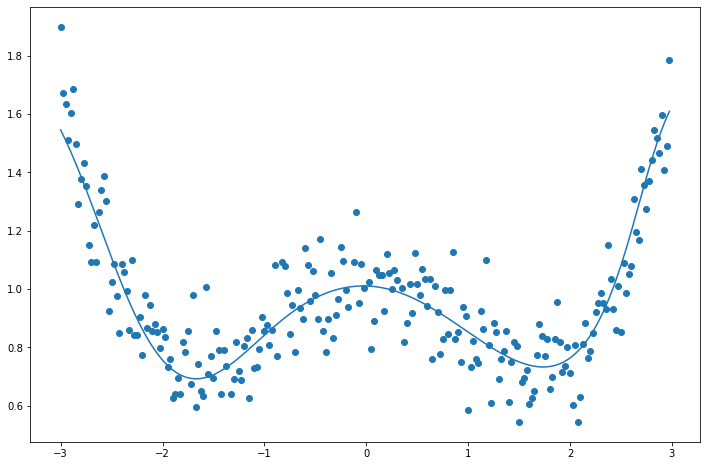

In [13]:
#推定
pred_y = model.predict(data_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)